# 1. SVM Kernel Exercise Using Iris Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

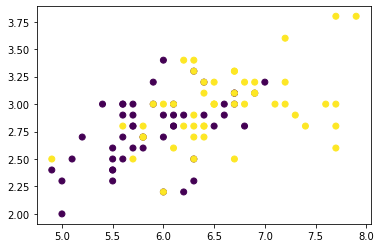

In [3]:
data = data[target !=0, :2]
target = target[target !=0]

plt.scatter(data[:, 0], data[:, 1], c=target)

### 1.2 Data Split

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.9, random_state=2021)

# 2. Linear Kernel
- SVM은 `sklearn.svm` 의 `SVC`로 사용

In [5]:
from sklearn.svm import SVC

linear_svc = SVC(kernel="linear")

In [6]:
linear_svc.fit(train_data, train_target)

SVC(kernel='linear')

### 2.1 Visualization
plot의 속성
- decision boundary
    - 검은색 직선
- support vector
    - 검은색 점선
- 영역
    - 클래스로 구별되는 영역

In [7]:
def plot_support_vector_machine(svm):
    # 전체 데이터
    plt.scatter(data[:, 0], data[:, 1], c=target, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # test 데이터
    plt.scatter(test_data[:, 0], test_data[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = data[:, 0].min()
    x_max = data[:, 0].max()
    y_min = data[:, 1].min()
    y_max = data[:, 1].max()
    
    # 영역 칠하기
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

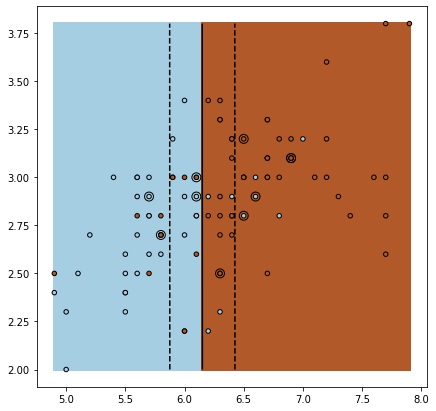

In [8]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(linear_svc)

# 3. Poly Kernel
poly커널은 직선을 곡선으로 mapping 시켜주는 커널  
poly커널에 영향을 미치는 argument
- gamma
    - 결경 경계를 스케일링해주는 값
- degree
    - 몇 차원의 곡선으로 맵핑할지 정해주는 값

### 3.1 gamma

#### 3.1.1 scale
- default 옵션은 자동으로 scaling

In [9]:
poly_svc = SVC(kernel="poly")

poly_svc.fit(train_data, train_target)

SVC(kernel='poly')

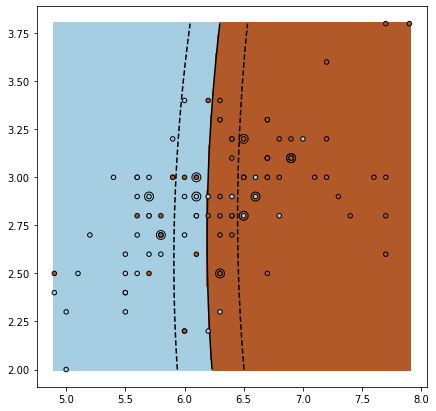

In [10]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

#### 3.1.2 gamma=0.1
- gamma값을 작게 해주었을 경우

In [11]:
poly_svc = SVC(kernel="poly", gamma=0.1)
poly_svc.fit(train_data, train_target)

SVC(gamma=0.1, kernel='poly')

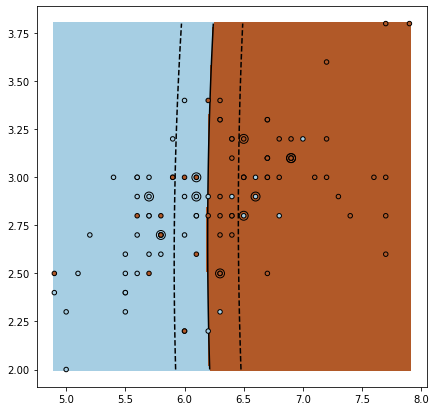

In [12]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

#### 3.1.3 gamma=10
- gamma값을 크게 해주었을 경우

In [13]:
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

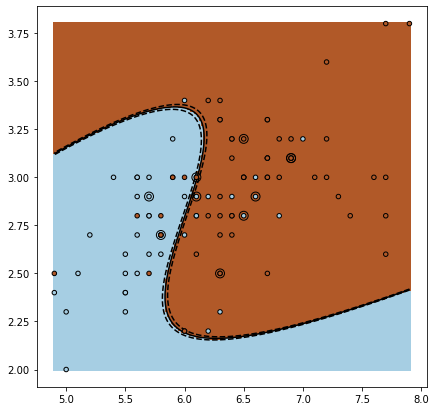

In [14]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

### 3.2 degree

#### 3.2.1 degree=2

In [15]:
poly_svc = SVC(kernel="poly", gamma=10, degree=2)
poly_svc.fit(train_data, train_target)

SVC(degree=2, gamma=10, kernel='poly')

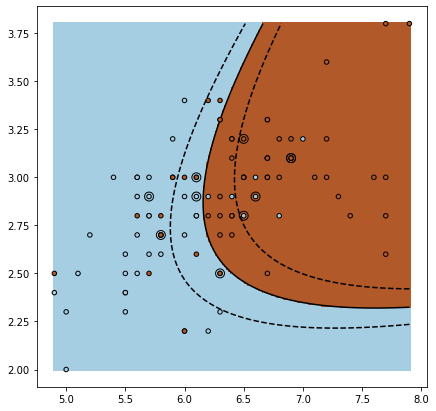

In [16]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

#### 3.2.1 degree=4

In [17]:
poly_svc = SVC(kernel="poly", gamma=10, degree=4)
poly_svc.fit(train_data, train_target)

SVC(degree=4, gamma=10, kernel='poly')

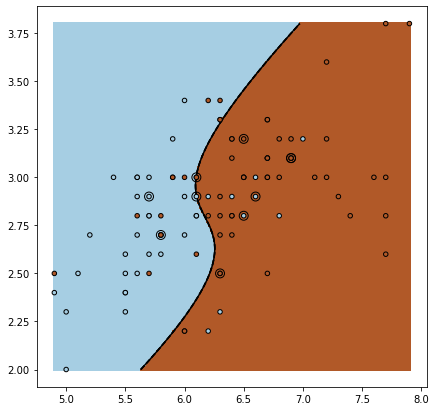

In [18]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

# 4. RBF Kernel
- rbf 커널은 데이터를 고차원의 공간으로 mapping
- rbf또한 gamma 값으로 scaling

### 4.1 scale

In [19]:
rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(train_data, train_target)

SVC()

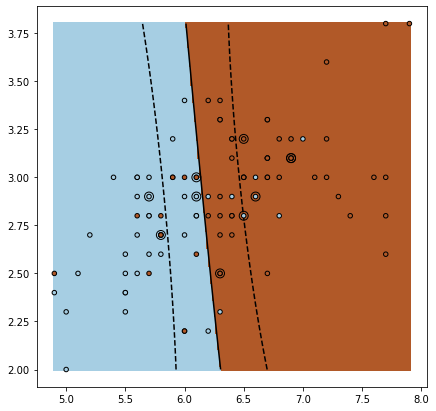

In [20]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

### 4.2 gamma=0.1

In [21]:
rbf_svc = SVC(kernel="rbf", gamma=0.1)
rbf_svc.fit(train_data, train_target)

SVC(gamma=0.1)

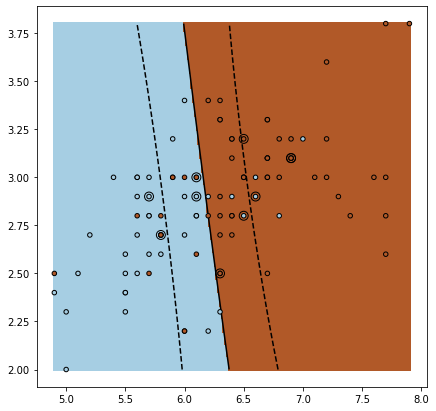

In [22]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

### 4.3 gamma=10

In [23]:
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

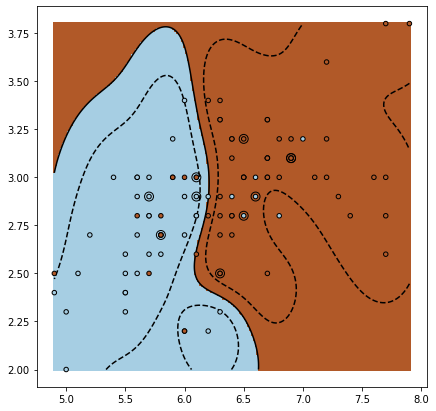

In [24]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

# 5. Penalty
- 패널티는 `C` argument를 통해 설정 가능

### 5.1 Poly

In [25]:
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

In [26]:
hard_penalty_poly_svc = SVC(kernel="poly", gamma=10, C=100)
hard_penalty_poly_svc.fit(train_data, train_target)

SVC(C=100, gamma=10, kernel='poly')

Text(0.5, 1.0, 'Hard penalty')

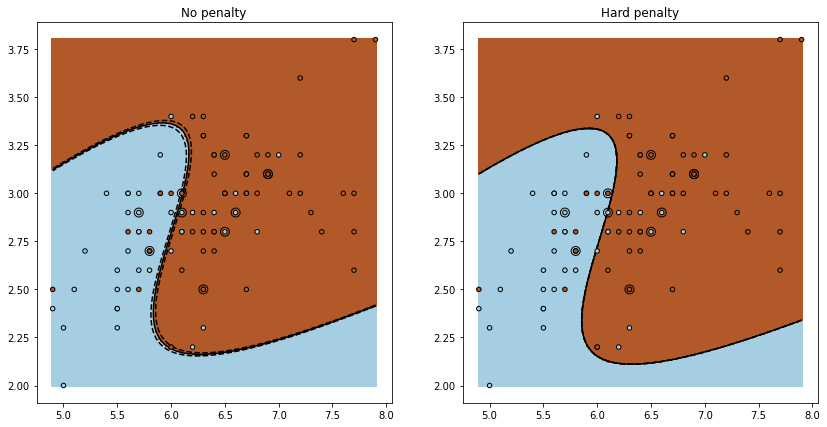

In [27]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plot_support_vector_machine(poly_svc)
plt.title("No penalty")

plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_poly_svc)
plt.title("Hard penalty")

### 5.2 RBF

In [28]:
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

In [29]:
hard_penalty_svc = SVC(kernel="rbf", gamma=10, C=100)
hard_penalty_svc.fit(train_data, train_target)

SVC(C=100, gamma=10)

Text(0.5, 1.0, 'Hard penalty')

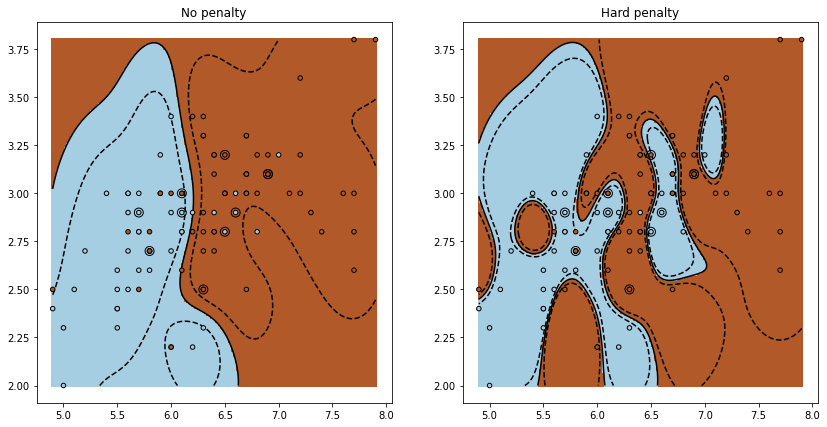

In [30]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plot_support_vector_machine(rbf_svc)
plt.title("No penalty")

plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_svc)
plt.title("Hard penalty")

# 6. Summary

> SVM(Support Vector Machine) 정의
- 결정 경계을 정의하는 모델

> SVM 목표
- Margin을 최대화하는 결정 경계 찾기
- 이 때 Support Vector가 결정 경계 만드는에 영향 주므로 SVM이라고 불림

> 구성요소
- Support Vector : 두 클래스 사이 경계에 위치한 데이터 포인트들
- Margin : 결정경계와 서포트 벡터 사이의 거리X2
- Decision Boundary : 데이터 나누는 기준이 되는 경계

> Margin 종류
- Hard Margin : 어떠한 오분류 허용하지 않음
- Soft Margin : 어느정도의 오분류 허용 -> Penalty
- Penalty 종류
    - 0-1 Loss : Error가 발생한 개수만큼 패널티 계산
    - Hinge Loss : 오분류 정도에 따라 패널티 계산
    
> 커널 트릭
- 저차원 데이터를 고차원 데이터로 맵핑하는 작업

> 커널 종류
- 선형
- 다항식
- 가우시안 RBF

> SVM 장점
- 비선형 분리 데이터도 커널 사용하여 분류 가능
- 고차원 데이터에도 사용 가능

> SVM 단점
- 데이터가 많을수록 속도 저하
- 확률 추정치 제공하지 않음